<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.481876,28.548114,-39.308094,85.721897,112.394334,-26.672437
1,0.0,1.0,58.316421,70.464591,261.402260,400.183273,136.091000,264.092273
2,0.0,2.0,24.518425,32.508788,121.913481,188.940694,105.789837,83.150857
3,0.0,3.0,46.635575,22.659673,-16.701070,62.594178,102.533178,-39.939001
4,0.0,4.0,59.416844,83.665291,82.561843,235.643978,145.040642,90.603336
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.484792,79.945656,-256.949863,-136.519414,97.045115,-233.564529
19996,999.0,16.0,99.480982,83.324704,-48.906102,143.899585,178.160381,-34.260796
19997,999.0,17.0,66.914439,86.283888,46.654022,209.852349,142.673209,67.179140
19998,999.0,18.0,95.473652,61.946446,11.368735,178.788833,160.427552,18.361281


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.481876,28.548114,-39.308094,85.721897,112.394334,-26.672437
1,0.0,1.0,58.316421,70.464591,261.402260,400.183273,136.091000,264.092273
2,0.0,2.0,24.518425,32.508788,121.913481,188.940694,105.789837,83.150857
3,0.0,3.0,46.635575,22.659673,-16.701070,62.594178,102.533178,-39.939001
4,0.0,4.0,59.416844,83.665291,82.561843,235.643978,145.040642,90.603336
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.484792,79.945656,-256.949863,-136.519414,97.045115,-233.564529
19996,999.0,16.0,99.480982,83.324704,-48.906102,143.899585,178.160381,-34.260796
19997,999.0,17.0,66.914439,86.283888,46.654022,209.852349,142.673209,67.179140
19998,999.0,18.0,95.473652,61.946446,11.368735,178.788833,160.427552,18.361281


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.481876,28.548114,-39.308094,85.721897,112.394334,-26.672437
1,0.0,1.0,58.316421,70.464591,261.402260,400.183273,136.091000,264.092273
2,0.0,2.0,24.518425,32.508788,121.913481,188.940694,105.789837,83.150857
3,0.0,3.0,46.635575,22.659673,-16.701070,62.594178,102.533178,-39.939001
4,0.0,4.0,59.416844,83.665291,82.561843,235.643978,145.040642,90.603336
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.484792,79.945656,-256.949863,-136.519414,97.045115,-233.564529
19996,999.0,16.0,99.480982,83.324704,-48.906102,143.899585,178.160381,-34.260796
19997,999.0,17.0,66.914439,86.283888,46.654022,209.852349,142.673209,67.179140
19998,999.0,18.0,95.473652,61.946446,11.368735,178.788833,160.427552,18.361281


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

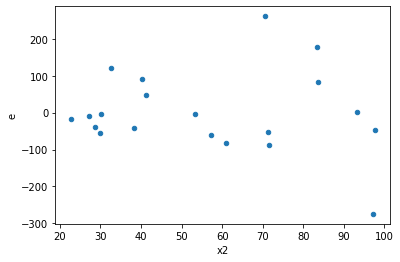

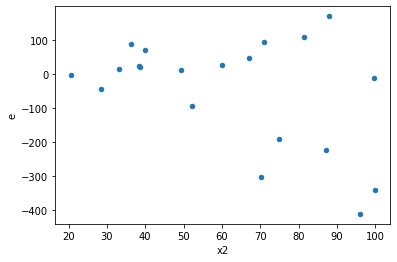

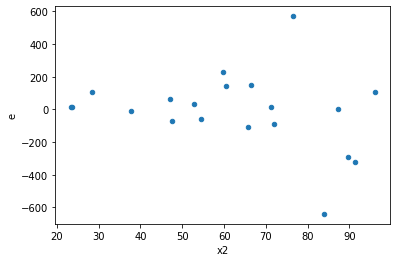

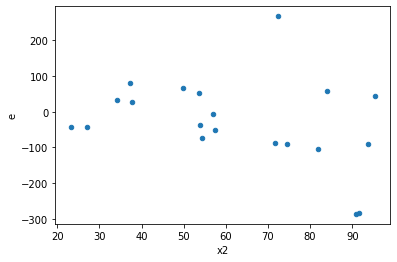

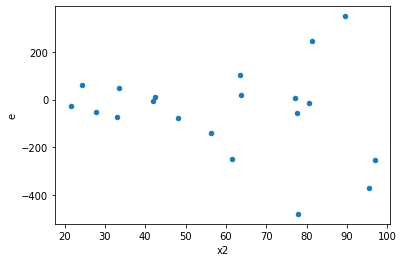

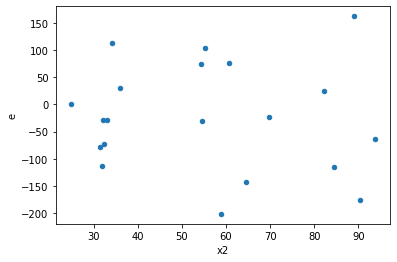

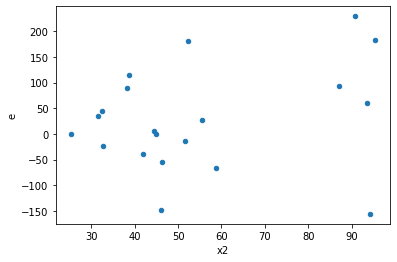

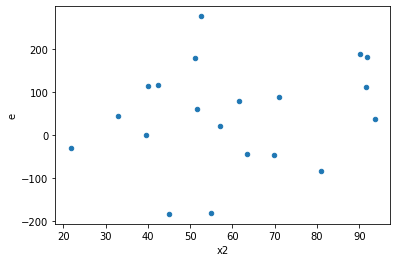

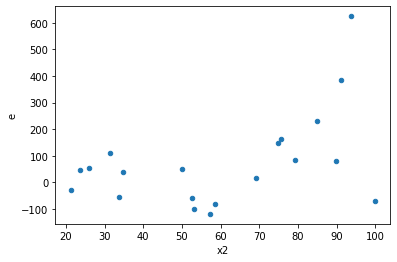

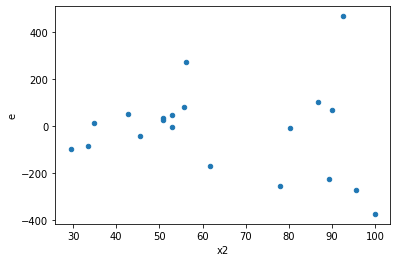

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,14232.16035963553,132317.44033044679,2372.026726605922,22052.906721741132,9.297073458061801,0.015753610810223417,0.9921231945948883,0.007876805405111709,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,83472.40771647691,193150.58590680576,13912.067952746153,32191.76431780096,2.3139453046911345,0.33081957440784526,0.8345902127960774,0.16540978720392263,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,36677.21841372077,57087.71576448519,6112.869735620129,9514.619294080865,1.5564897839452554,0.6045646617029448,0.6977176691485276,0.3022823308514724,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,35388.69204137649,103424.1653989608,5898.115340229415,17237.3608998268,2.922520145080162,0.21758450160828757,0.8912077491958562,0.10879225080414379,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,11667.505163841024,307113.5613602915,1944.584193973504,51185.59356004858,26.322127742619106,0.0009275410435276576,0.9995362294782362,0.0004637705217638288,Reject005=0 : Heteroscedasticity
10.0,6.0,6.0,12799.75445892013,139685.9058887509,2133.2924098200215,23280.984314791815,10.91317074378751,0.010389603381336876,0.9948051983093316,0.005194801690668438,Reject005=0 : Heteroscedasticity
11.0,6.0,6.0,20027.34222851845,461526.1325508995,3337.8903714197418,76921.02209181659,23.044801815674646,0.0013504298763400424,0.99932478506183,0.0006752149381700212,Reject005=0 : Heteroscedasticity
12.0,6.0,6.0,4818.912892254982,150976.84601171588,803.1521487091636,25162.807668619313,31.330063312488548,0.0005647282880405502,0.9997176358559797,0.0002823641440202751,Reject005=0 : Heteroscedasticity
14.0,6.0,6.0,40319.65577535377,124107.66794198817,6719.9426292256285,20684.611323664696,3.078093439920972,0.19706206771197454,0.9014689661440127,0.09853103385598727,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,14232.16035963553,132317.44033044679,2372.026726605922,22052.906721741132,9.297073458061801,0.015753610810223417,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,144882.43853821824,20157.182700585552,24147.07308970304,3359.530450097592,0.13912785361676758,0.030088594484789503,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,418215.8782355327,27749.185769973792,69702.64637258879,4624.864294995632,0.06635134439909017,0.0043796233545488365,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,109908.40125379305,21322.07528253807,18318.066875632176,3553.679213756345,0.1939985937317255,0.06623696513197483,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,83472.40771647691,193150.58590680576,13912.067952746153,32191.76431780096,2.3139453046911345,0.33081957440784526,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,36677.21841372077,57087.71576448519,6112.869735620129,9514.619294080865,1.5564897839452554,0.6045646617029448,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,35388.69204137649,103424.1653989608,5898.115340229415,17237.3608998268,2.922520145080162,0.21758450160828757,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,100911.18885996139,80625.29163551802,16818.53147666023,13437.54860591967,0.7989727655216218,0.7922147436371422,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,11667.505163841024,307113.5613602915,1944.584193973504,51185.59356004858,26.322127742619106,0.0009275410435276576,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      674
Reject005=0 : Heteroscedasticity    326
Name: Result_test, dtype: int64